In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import os 

In [2]:
demographics = [
    'P07', 'P10', 'P11', 'P13', 'P14', 'P16', 'P17', 'P18', 'P22', 'P23', 
    'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 
    'P34', 'P35', 'P36'
]

In [3]:
timings = []
for subject in demographics:
    path = os.path.join("data", "lsl", subject+"_lsl.tri")
    timing = pd.read_csv(path, sep=";", header=None, names=['time', 'onset', 'code'])
    timing['time'] = pd.to_datetime(timing['time']).dt.strftime('%H:%M:%S')
    timings.append(timing)
print(timings[0].shape)
print(timings[0].head())


(362, 3)
       time  onset  code
0  16:54:02   1583    30
1  16:54:16   1638    40
2  16:54:26   1675    90
3  16:54:35   1709    20
4  16:54:48   1757    50


In [4]:
data = {}
for subject in demographics:
    path = os.path.join("data", "data_csvs", subject+".csv")
    fnir = pd.read_csv(path, sep=",", header=0)
    fnir = fnir.drop(columns=['Time'])
    data[subject] = fnir
print(data['P07'].head())

         Ch1       Ch2        Ch3       Ch4        Ch5       Ch6       Ch7  \
0 -30.737259  4.217945  -9.949267  7.276555 -25.171749  0.132245 -6.699986   
1 -29.338383  4.719302 -12.477225  6.479262 -25.561359 -0.462352 -4.677611   
2 -27.876869  5.192062 -14.931240  5.624817 -25.899460 -0.941451 -2.413918   
3 -26.310300  5.614543 -17.221782  4.683419 -26.157453 -1.199534  0.300224   
4 -24.616998  5.967590 -19.276144  3.636096 -26.324703 -1.152255  3.624535   

        Ch8        Ch9      Ch10  ...      Ch169     Ch170      Ch171  \
0  3.965802 -38.122370 -9.459359  ... -19.952898 -6.985181 -11.016354   
1  3.911549 -34.141558 -7.101328  ... -14.057330 -3.168199  -5.667243   
2  3.984652 -30.318783 -4.837616  ...  -8.359472  0.555269  -0.175635   
3  4.304991 -26.864080 -2.788756  ...  -3.120284  4.050139   5.529127   
4  4.968803 -23.961938 -1.059800  ...   1.411449  7.182750  11.466906   

       Ch172        Ch173       Ch174      Ch175      Ch176       Ch177  \
0  -2.944079 -191

In [5]:
#load the workload labels
workload = pd.read_csv("data/load/workload.csv")
workload['timestamp'] = workload['timestamp'].str.replace('.', ':')

workload.head()

,timestamp,participant_number,trial,condition,accuracy,extrinsic_load,intrinsic_load,condition_factor,last_trial,trial_clipped,response,pred_prob,pred_side,load_label
0,17:06:55,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal
1,17:07:01,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal
2,17:07:13,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal
3,17:07:22,7,1,A3,0,0,1,A3,0,1,0,0.842584,right,overload
4,17:07:29,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal


In [6]:
#separate the data into the different participants
workload_dict = {}
for i in range(len(demographics)):
    workload_dict[demographics[i]] = workload[workload['participant_number'] == int(demographics[i][1:])].iloc[:, :]
    workload_dict['P07']
workload_dict['P07']


,timestamp,participant_number,trial,condition,accuracy,extrinsic_load,intrinsic_load,condition_factor,last_trial,trial_clipped,response,pred_prob,pred_side,load_label
0,17:06:55,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal
1,17:07:01,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal
2,17:07:13,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal
3,17:07:22,7,1,A3,0,0,1,A3,0,1,0,0.842584,right,overload
4,17:07:29,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,17:36:12,7,7,S2,0,1,0,S2,1,6,0,0.533406,right,overload
158,17:36:41,7,7,S2,0,1,0,S2,1,6,0,0.533406,right,overload
159,17:36:48,7,7,S2,0,1,0,S2,1,6,0,0.533406,right,overload
160,17:36:52,7,7,S2,0,1,0,S2,1,6,0,0.533406,right,overload


In [7]:
# Filter matched_df to get rows where the timestamp is in the 'time' column of the first DataFrame in timings
for i in range(len(demographics)):
    matched_times = timings[i][timings[i]['time'].isin(workload_dict[demographics[i]]['timestamp'])]
    workload_dict[demographics[i]] = workload_dict[demographics[i]].merge(matched_times, left_on='timestamp', right_on='time', how='left')
workload_dict['P07'].head()

,timestamp,participant_number,trial,condition,accuracy,extrinsic_load,intrinsic_load,condition_factor,last_trial,trial_clipped,response,pred_prob,pred_side,load_label,time,onset,code
0,17:06:55,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal,17:06:55,4533,103
1,17:07:01,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal,17:07:01,4556,53
2,17:07:13,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal,17:07:13,4600,153
3,17:07:22,7,1,A3,0,0,1,A3,0,1,0,0.842584,right,overload,17:07:22,4634,163
4,17:07:29,7,1,A3,1,0,1,A3,0,1,1,0.842584,right,optimal,17:07:29,4661,153


In [ ]:
 

for sub in demographics:
    if data[sub].isna().any().any():
        print(sub)
        continue
    print(sub)
    valid_indices = workload_dict[sub]['onset'].dropna().astype(int).values
   
    valid_indices = valid_indices
    
    
    # Filter valid_indices to keep only those within the range of data[sub]'s indices
    valid_indices = valid_indices[valid_indices < len(data[sub])]

    new_data = data[sub].iloc[valid_indices].reset_index(drop=True)
    
    workload_dict[sub] = pd.concat([workload_dict[sub].reset_index(drop=True), new_data], axis=1)
    
workload_dict['P07'].head()

P07
P10
P11
P13
P14
P16
P17
P18
P22
P23
P24
P25
P26
P27
P28
P29
P30
P31
P32
P33
P34
P35
P36


,timestamp,participant_number,trial,condition,accuracy,extrinsic_load,intrinsic_load,condition_factor,last_trial,trial_clipped,...,Ch169,Ch170,Ch171,Ch172,Ch173,Ch174,Ch175,Ch176,Ch177,Ch178
0,17:06:55,7,1,A3,1,0,1,A3,0,1,...,-28.392138,-8.599272,-25.041677,-6.186528,-1094.045207,333.183065,-330.983344,37.527639,-355.931209,171.897913
1,17:07:01,7,1,A3,1,0,1,A3,0,1,...,-17.350241,-2.969926,-42.594985,-24.146187,1332.767838,-1957.338916,-5.639428,111.540656,339.321053,-566.304994
2,17:07:13,7,1,A3,1,0,1,A3,0,1,...,-6.485226,3.885785,-1.736070,7.154738,403.041254,492.686926,-133.187001,-15.204565,-562.971768,40.994511
3,17:07:22,7,1,A3,0,0,1,A3,0,1,...,10.461493,9.437321,-7.543561,-4.969810,-140.052321,-107.290546,-37.814329,-117.431324,-79.578207,-70.482628
4,17:07:29,7,1,A3,1,0,1,A3,0,1,...,18.903412,9.825091,26.850640,16.563793,36.824130,47.099188,118.935248,54.381627,-585.469837,833.706975


In [9]:


complete_data = {k: v for k, v in workload_dict.items() if v.shape[1] > 30 and v.shape[0] > 0 and pd.isna(v).any().any() == False}

merged_df = pd.concat(complete_data.values(), ignore_index=True)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
print(merged_df.shape)
print(merged_df['Ch1'].head())
channels = [col for col in merged_df.columns if isinstance(col, str) and 'Ch' in col]
print(merged_df['Ch170'].head())
print(channels)
merged_df['load_label'] = merged_df['load_label'].apply(lambda x: 0 if x == 'optimal' else 1).astype('category')
anova_results = {}


(984, 195)
0     1.849166
1   -11.993490
2    -2.498076
3   -28.051318
4    -2.568674
Name: Ch1, dtype: float64
0   -8.599272
1   -2.969926
2    3.885785
3    9.437321
4    9.825091
Name: Ch170, dtype: float64
['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8', 'Ch9', 'Ch10', 'Ch11', 'Ch12', 'Ch13', 'Ch14', 'Ch15', 'Ch16', 'Ch17', 'Ch18', 'Ch19', 'Ch20', 'Ch21', 'Ch22', 'Ch23', 'Ch24', 'Ch25', 'Ch26', 'Ch27', 'Ch28', 'Ch29', 'Ch30', 'Ch31', 'Ch32', 'Ch33', 'Ch34', 'Ch35', 'Ch36', 'Ch37', 'Ch38', 'Ch39', 'Ch40', 'Ch41', 'Ch42', 'Ch43', 'Ch44', 'Ch45', 'Ch46', 'Ch47', 'Ch48', 'Ch49', 'Ch50', 'Ch51', 'Ch52', 'Ch53', 'Ch54', 'Ch55', 'Ch56', 'Ch57', 'Ch58', 'Ch59', 'Ch60', 'Ch61', 'Ch62', 'Ch63', 'Ch64', 'Ch65', 'Ch66', 'Ch67', 'Ch68', 'Ch69', 'Ch70', 'Ch71', 'Ch72', 'Ch73', 'Ch74', 'Ch75', 'Ch76', 'Ch77', 'Ch78', 'Ch79', 'Ch80', 'Ch81', 'Ch82', 'Ch83', 'Ch84', 'Ch85', 'Ch86', 'Ch87', 'Ch88', 'Ch89', 'Ch90', 'Ch91', 'Ch92', 'Ch93', 'Ch94', 'Ch95', 'Ch96', 'Ch97', 'Ch98', 'Ch99', 'Ch100

In [10]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

anova_results = {}  # Initialize an empty dictionary to store results

for channel in channels:
    
    # Ensure the channel data is numeric
    merged_df[channel] = pd.to_numeric(merged_df[channel], errors='coerce')  # Convert to numeric, force errors to NaN
    merged_df = merged_df.dropna(subset=[channel])  # Drop NaN values in the channel column

    # Fit mixed-effects model
    model = smf.mixedlm(f"{channel} ~ C(load_label)", merged_df, groups=merged_df["participant_number"].astype(str))
    result = model.fit()

    # Extract p-value for the label effect
    p_value = result.pvalues.get("C(load_label)[T.1]", None)  # Adjust based on your categorical variable encoding
    f_stat = result.tvalues.get("C(load_label)[T.1]", None)  # Extract equivalent F-statistic
    
    if p_value is not None:
        anova_results[channel] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert results to DataFrame and sort by significance
anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values(by="p-value")

# Display most significant channels
print(anova_df.head(10))  # Top 10 most significant channels


c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge

       F-statistic   p-value
Ch172    -4.020015  0.000058
Ch67     -3.787563  0.000152
Ch64     -3.630717  0.000283
Ch58     -3.590327  0.000330
Ch63     -3.558941  0.000372
Ch109    -3.540274  0.000400
Ch68      3.400157  0.000673
Ch2      -3.355342  0.000793
Ch112    -3.096883  0.001956
Ch94     -3.033166  0.002420


c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\Alex\anaconda3\envs\workload\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.war

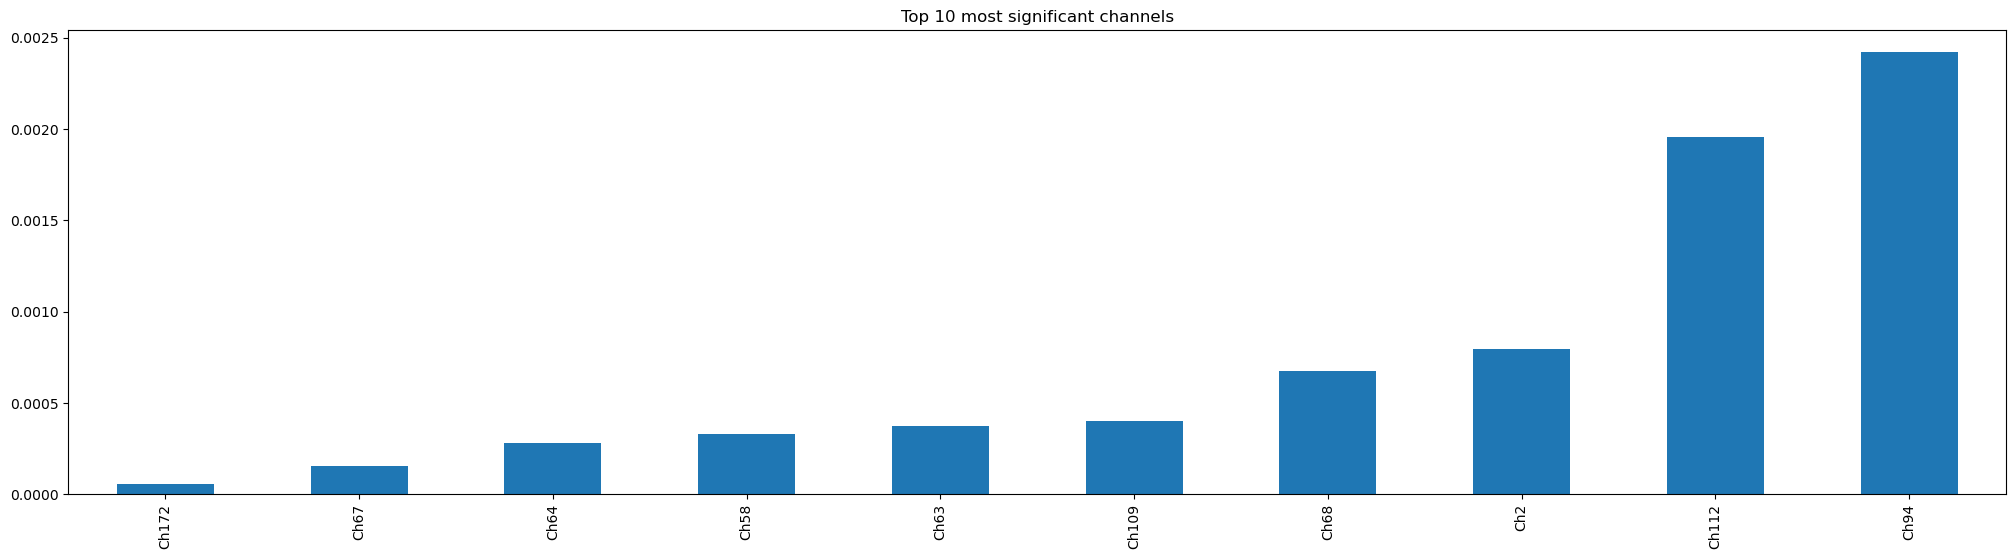

In [17]:
anova_df.head(10).plot(kind='bar', y='p-value', title='Top 10 most significant channels', legend=False)
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().set_size_inches(25, 8)

plt.show()